# Gold Price Prediction  (from 2008 to 2018 year)

In This Project I have performed

1. Create Model Using Random Forest and predict the value of Gold
2. Forcast the value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('gold price dataset.csv')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882499,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303296,1.369971,1.598798


### Correlation
1. Postive Correlation 
2. Negative Correlation 

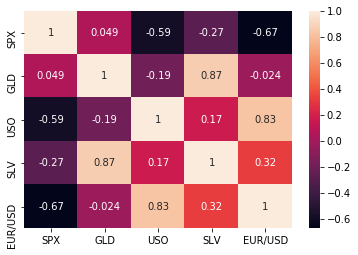

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.corr()['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

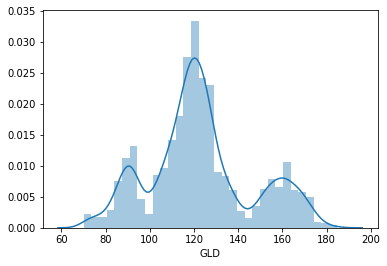

In [7]:
# Checking The Distribution of Gold Price ( GLD )

sns.distplot(df['GLD'])

In [8]:
# let see out distribution

feat = [feat for feat in df.columns if df[feat].dtype != 'O']

feat

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

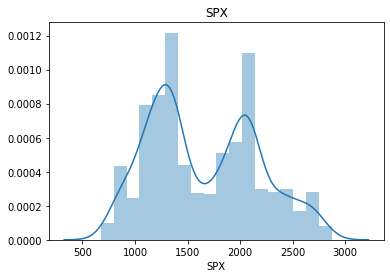

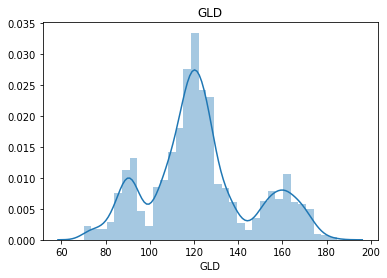

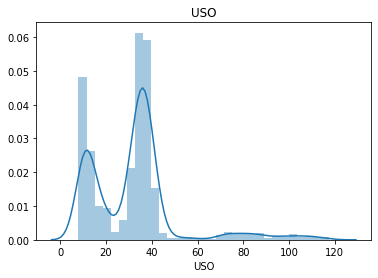

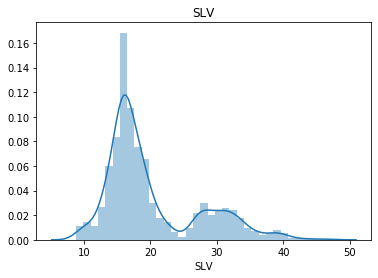

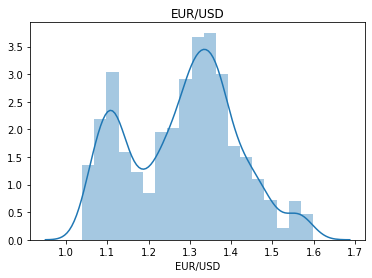

In [9]:
for value in feat:
    sns.distplot(df[value])
    plt.title(value)
    plt.show()

In [10]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [11]:
X = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

## Train Test Split 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest 

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)


from sklearn.metrics import r2_score
print(r2_score(rf_pred , y_test))


0.9908751113693561


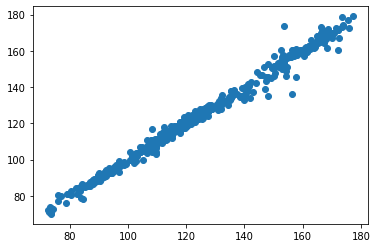

In [14]:
plt.scatter(rf_pred, y_test)

### Perfect .....

# Wow We Get 0.99% Accuracy !!  

# --------------------------------------------------------------------------------------------------------------

# Let's Now Forcast the Gold Price 

In [15]:
from fbprophet import Prophet

In [16]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
data = df[['Date','GLD']]

data

,Date,GLD
0,2008-01-02,84.860001
1,2008-01-03,85.570000
2,2008-01-04,85.129997
3,2008-01-07,84.769997
4,2008-01-08,86.779999
...,...,...
2285,2018-05-08,124.589996
2286,2018-05-09,124.330002
2287,2018-05-10,125.180000
2288,2018-05-14,124.489998


In [26]:
df.shape

(2290, 6)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2290 non-null   datetime64[ns]
 1   GLD     2290 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.9 KB


In [21]:
# date = ds(datestamp) and column = (y)
# Prophet take datestamp in (YYYY-MM-DD)

In [22]:
data.columns = ['ds','y']

In [23]:
data

,ds,y
0,2008-01-02,84.860001
1,2008-01-03,85.570000
2,2008-01-04,85.129997
3,2008-01-07,84.769997
4,2008-01-08,86.779999
...,...,...
2285,2018-05-08,124.589996
2286,2018-05-09,124.330002
2287,2018-05-10,125.180000
2288,2018-05-14,124.489998


In [25]:
model = Prophet(interval_width=0.95)  # interval_width is a confindent interval 95% ur model is correct and 5% of error
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# Creating Feature Date DataFrame 

feature = model.make_future_dataframe(periods=35) # we have to predict next 35 days
feature.tail(35)

,ds
2290,2018-05-17
2291,2018-05-18
2292,2018-05-19
2293,2018-05-20
2294,2018-05-21
2295,2018-05-22
2296,2018-05-23
2297,2018-05-24
2298,2018-05-25
2299,2018-05-26


In [28]:
forecast = model.predict(feature)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-02,91.983797,80.667777,99.165335,91.983797,91.983797,-1.779319,-1.779319,-1.779319,1.573814,1.573814,1.573814,-3.353132,-3.353132,-3.353132,0.0,0.0,0.0,90.204478
1,2008-01-03,91.939244,80.587742,99.955000,91.939244,91.939244,-1.686553,-1.686553,-1.686553,1.517529,1.517529,1.517529,-3.204082,-3.204082,-3.204082,0.0,0.0,0.0,90.252691
2,2008-01-04,91.894691,80.901383,99.885637,91.894691,91.894691,-1.521237,-1.521237,-1.521237,1.523039,1.523039,1.523039,-3.044275,-3.044275,-3.044275,0.0,0.0,0.0,90.373455
3,2008-01-07,91.761033,82.047537,99.690018,91.761033,91.761033,-0.909164,-0.909164,-0.909164,1.617029,1.617029,1.617029,-2.526193,-2.526193,-2.526193,0.0,0.0,0.0,90.851869
4,2008-01-08,91.716480,82.282823,99.843303,91.716480,91.716480,-0.782873,-0.782873,-0.782873,1.566340,1.566340,1.566340,-2.349213,-2.349213,-2.349213,0.0,0.0,0.0,90.933608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2018-06-16,122.958358,109.104257,127.872163,122.265801,123.459332,-4.762054,-4.762054,-4.762054,-3.898875,-3.898875,-3.898875,-0.863178,-0.863178,-0.863178,0.0,0.0,0.0,118.196305
2321,2018-06-17,122.967110,109.132487,127.732353,122.231182,123.545561,-4.823206,-4.823206,-4.823206,-3.898875,-3.898875,-3.898875,-0.924331,-0.924331,-0.924331,0.0,0.0,0.0,118.143904
2322,2018-06-18,122.975861,113.769475,132.975687,122.203128,123.599650,0.627992,0.627992,0.627992,1.617029,1.617029,1.617029,-0.989037,-0.989037,-0.989037,0.0,0.0,0.0,123.603854
2323,2018-06-19,122.984613,113.171626,131.902464,122.170215,123.648205,0.510525,0.510525,0.510525,1.566340,1.566340,1.566340,-1.055814,-1.055814,-1.055814,0.0,0.0,0.0,123.495138


In [31]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(50)

,ds,yhat,yhat_lower,yhat_upper
2275,2018-04-19,123.634187,114.861861,132.578293
2276,2018-04-23,123.800083,114.464721,132.353217
2277,2018-04-24,123.767928,114.630837,133.040891
2278,2018-04-25,123.792636,114.810744,132.555537
2279,2018-04-26,123.751239,114.717747,133.541521
2280,2018-04-30,123.868278,115.128011,133.447235
2281,2018-05-01,123.807831,114.670218,132.943068
2282,2018-05-02,123.798974,114.408798,133.202980
2283,2018-05-03,123.719653,115.022810,133.058627
2284,2018-05-07,123.664409,114.318818,132.924308


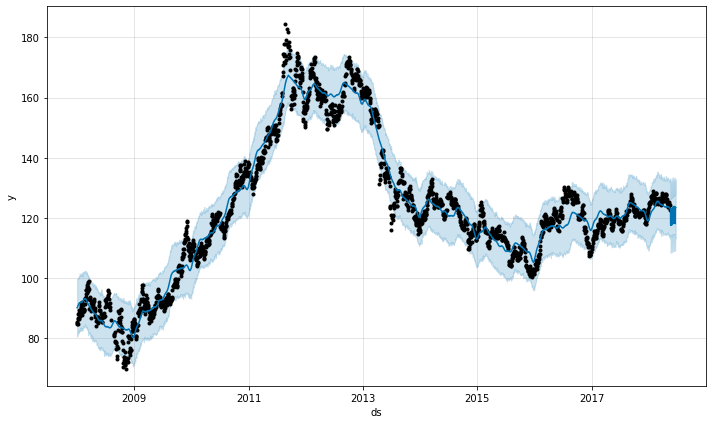

In [32]:
forecast_plot = model.plot(forecast)

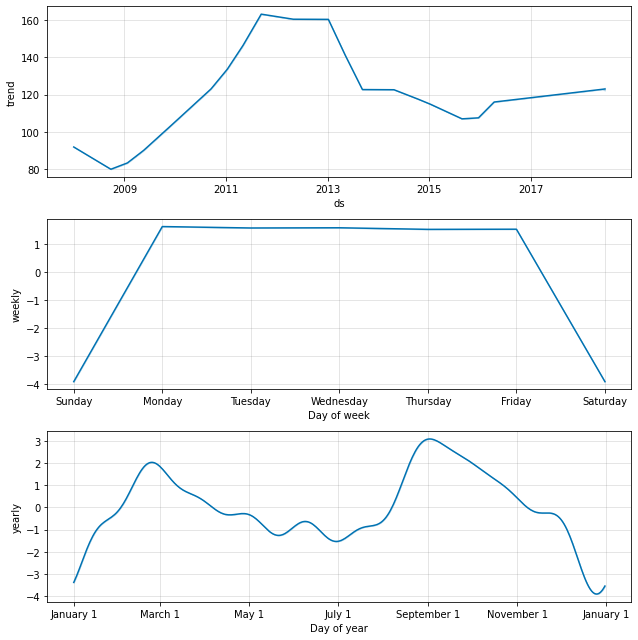

In [33]:
forecast_plot_components = model.plot_components(forecast)

# Forcasting is Done Perfectly.......